In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [77]:
df = pd.read_csv("/home/aditya/Downloads/examples/grad_ex1.csv")


In [78]:
df

,R&D Spend,Administration,Marketing Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94
5,131876.90,99814.71,362861.36,156991.12
6,134615.46,147198.87,127716.82,156122.51
7,130298.13,145530.06,323876.68,155752.60
8,120542.52,148718.95,311613.29,152211.77
9,123334.88,108679.17,304981.62,149759.96


In [79]:
x = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [80]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split( x, y, test_size = 0.3,random_state=42)
count = 0
for i in Xtest:
    count = count + 1
count

15

In [90]:
print(Ytrain)

[156122.51  77798.83  49490.75  42559.73 129917.04 149759.96 126992.93
 108552.04  96712.8   97483.56 192261.83  65200.33 105008.31  96778.92
 156991.12 101004.64 144259.4   90708.19 191792.06 111313.02 191050.39
  69758.98  96479.51 108733.99  78239.91 146121.95 110352.25 124266.9
  14681.4  118474.03 155752.6   71498.49 132602.65 103282.38  81229.06]


In [94]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

Xtrain = sc.fit_transform(Xtrain)
Xtest = sc.fit_transform(Xtest)

In [95]:
def CostFunction(x,y,w,b):
    cost = np.sum((((x.dot(w) + b) - y) ** 2) / (2*len(y)))
    return cost

def GradientDescent(x, y, w, b, learning_rate, epochs):
    cost_list = [0] * epochs
   
    for epoch in range(epochs):
        z = x.dot(w) + b
        loss = z - y
        
        weight_gradient = x.T.dot(loss) / len(y)
        bias_gradient = np.sum(loss) / len(y)
        
        w = w - learning_rate*weight_gradient
        b = b - learning_rate*bias_gradient
  
        cost = CostFunction(x, y, w, b)
        cost_list[epoch] = cost
        
        if (epoch%(epochs/50)==0):
            print("Cost at epoch %d is:%f" %(epoch, cost))
        
    return w, b, cost_list


In [96]:
w, b, c= GradientDescent(Xtrain, Ytrain, np.zeros(Xtrain.shape[1]), 0, 0.002,epochs=12000)

Cost at epoch 0 is:6991582222.163445
Cost at epoch 240 is:2590768253.468365
Cost at epoch 480 is:1012580602.620665
Cost at epoch 720 is:425654449.618890
Cost at epoch 960 is:201631027.031639
Cost at epoch 1200 is:113847440.930459
Cost at epoch 1440 is:78118063.185359
Cost at epoch 1680 is:62636556.955643
Cost at epoch 1920 is:55243280.145408
Cost at epoch 2160 is:51232907.169627
Cost at epoch 2400 is:48750846.999856
Cost at epoch 2640 is:47041649.708762
Cost at epoch 2880 is:45779034.070033
Cost at epoch 3120 is:44808216.310943
Cost at epoch 3360 is:44045954.345845
Cost at epoch 3600 is:43441144.939066
Cost at epoch 3840 is:42958805.415153
Cost at epoch 4080 is:42573186.408560
Cost at epoch 4320 is:42264528.036393
Cost at epoch 4560 is:42017330.752622
Cost at epoch 4800 is:41819302.615234
Cost at epoch 5040 is:41660643.046148
Cost at epoch 5280 is:41533517.610313
Cost at epoch 5520 is:41431655.787723
Cost at epoch 5760 is:41350035.796668
Cost at epoch 6000 is:41284634.770735
Cost at ep

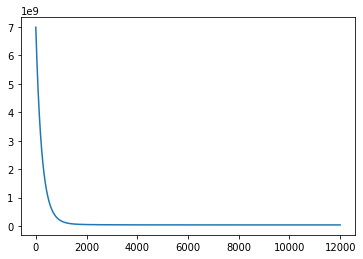

In [97]:
plt.plot(c)

In [110]:
def predict(X, w, b):
    return X.dot(w) + b
y_pred = predict(Xtest, w, b)

for i in range(0,len(y_pred)):
    print("The actual Value: %f, \t Predicted Value: %f" %(y_pred[i],Ytrain[i]))


The actual Value: 127411.874755, 	 Predicted Value: 156122.510000
The actual Value: 81002.466783, 	 Predicted Value: 77798.830000
The actual Value: 97475.587779, 	 Predicted Value: 49490.750000
The actual Value: 39740.291830, 	 Predicted Value: 42559.730000
The actual Value: 129953.499147, 	 Predicted Value: 129917.040000
The actual Value: 44295.272877, 	 Predicted Value: 149759.960000
The actual Value: 108632.139693, 	 Predicted Value: 126992.930000
The actual Value: 99490.398025, 	 Predicted Value: 108552.040000
The actual Value: 96575.422604, 	 Predicted Value: 96712.800000
The actual Value: 114276.798889, 	 Predicted Value: 97483.560000
The actual Value: 129579.994166, 	 Predicted Value: 192261.830000
The actual Value: 178516.400124, 	 Predicted Value: 65200.330000
The actual Value: 88743.561456, 	 Predicted Value: 105008.310000
The actual Value: 153712.469623, 	 Predicted Value: 96778.920000
The actual Value: 179122.019329, 	 Predicted Value: 156991.120000


In [111]:
def r2score(y_pred, y):
    rss = np.sum((y_pred - y) ** 2)
    tss = np.sum((y-y.mean()) ** 2)
    
    r2 = 1 - (rss / tss)
    return r2
r2score(y_pred, Ytest)

0.9411797687721161